# HOUSE PRICE PREDICTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
#load datasets
train=pd.read_csv("housing_Train.csv")
test=pd.read_csv("housing_test.csv")

In [20]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [13]:
train.shape

(1168, 81)

In [21]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [6]:
test.shape

(292, 80)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [22]:
#combining train and test datasets into single dataframe
train['source']='train'
test['source']='test'
house=pd.concat([train,test],ignore_index=True)

In [23]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN,test
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN,test
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN,test
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN,test


In [24]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
source            object
Length: 82, dtype: object

In [13]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
source             0
Length: 82, dtype: int64

# EDA

# Visualization

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

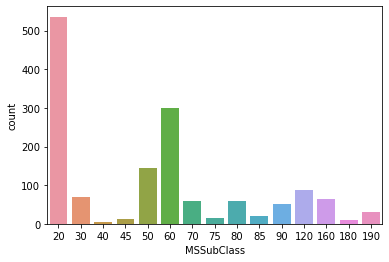

In [16]:
sns.countplot(house['MSSubClass'])

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

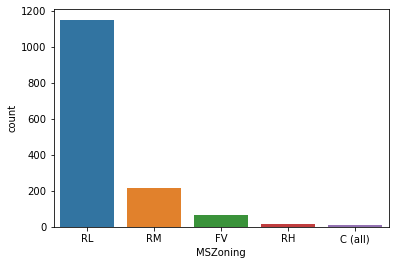

In [17]:
sns.countplot(house['MSZoning'])

<AxesSubplot:xlabel='Street', ylabel='count'>

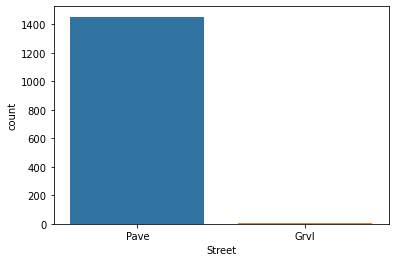

In [18]:
sns.countplot(house['Street'])

<AxesSubplot:xlabel='LotShape', ylabel='count'>

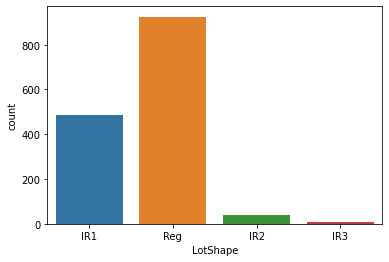

In [19]:
sns.countplot(house['LotShape'])

<AxesSubplot:xlabel='LandContour', ylabel='count'>

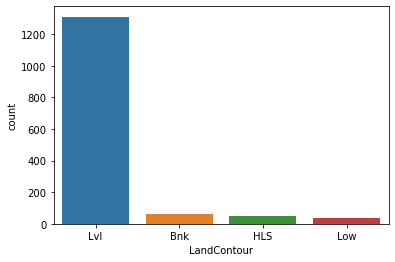

In [20]:
sns.countplot(house['LandContour'])

<AxesSubplot:xlabel='Utilities', ylabel='count'>

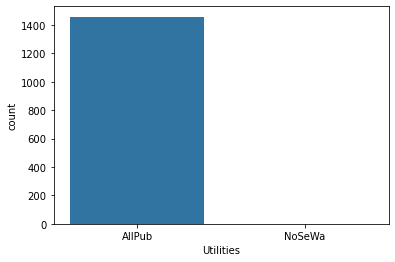

In [21]:
sns.countplot(house['Utilities'])

<AxesSubplot:xlabel='Alley', ylabel='count'>

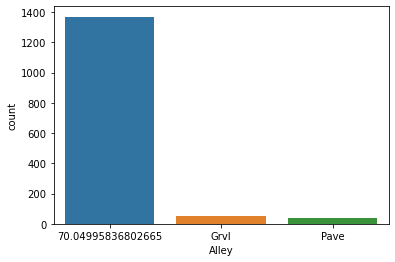

In [22]:
sns.countplot(house['Alley'])

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

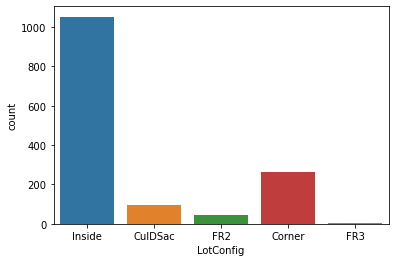

In [23]:
sns.countplot(house['LotConfig'])

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

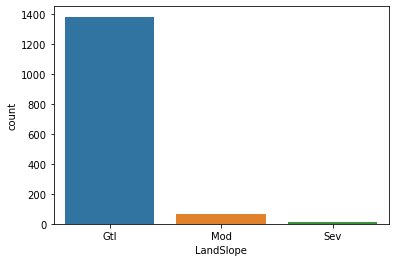

In [24]:
sns.countplot(house['LandSlope'])

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

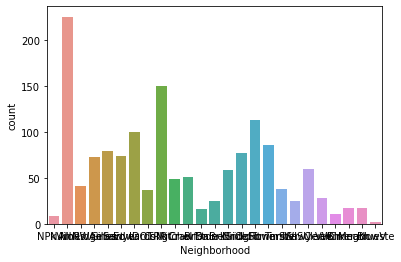

In [25]:
sns.countplot(house['Neighborhood'])

<AxesSubplot:xlabel='Condition1', ylabel='count'>

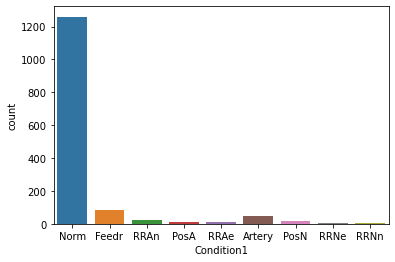

In [26]:
sns.countplot(house['Condition1'])

<AxesSubplot:xlabel='Condition2', ylabel='count'>

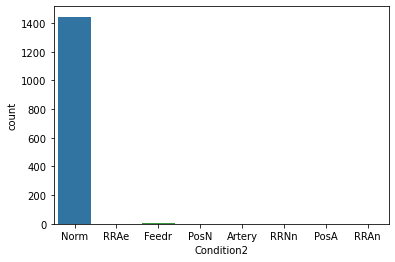

In [27]:
sns.countplot(house['Condition2'])

<AxesSubplot:xlabel='BldgType', ylabel='count'>

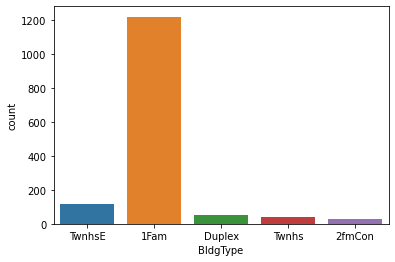

In [28]:
sns.countplot(house['BldgType'])

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

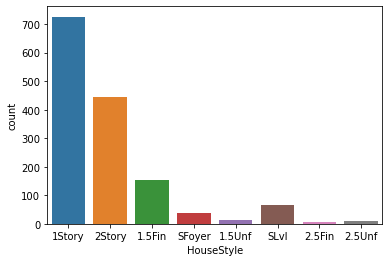

In [29]:
sns.countplot(house['HouseStyle'])

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

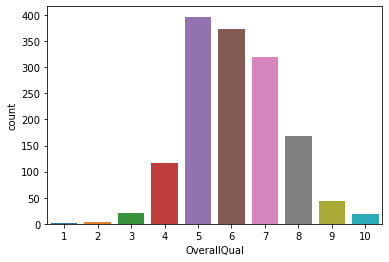

In [30]:
sns.countplot(house['OverallQual'])

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

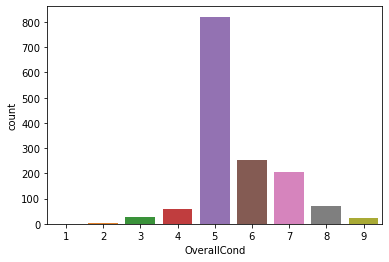

In [31]:
sns.countplot(house['OverallCond'])

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

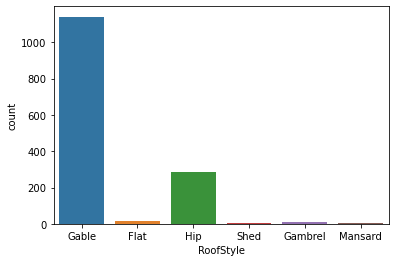

In [32]:
sns.countplot(house['RoofStyle'])

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

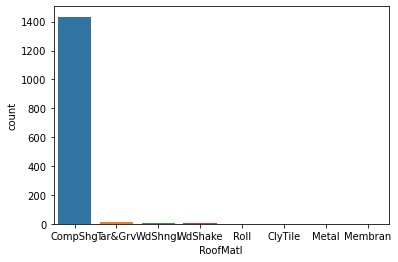

In [33]:
sns.countplot(house['RoofMatl'])

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

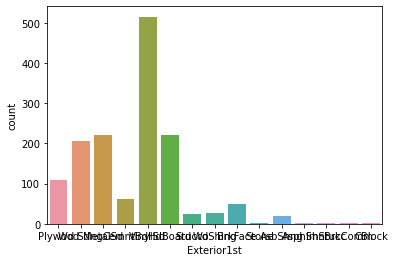

In [34]:
sns.countplot(house['Exterior1st'])

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

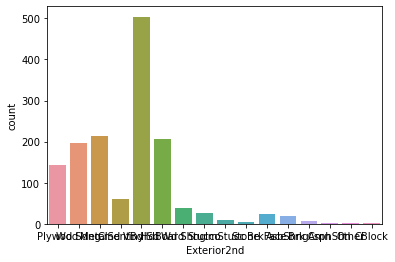

In [35]:
sns.countplot(house['Exterior2nd'])

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

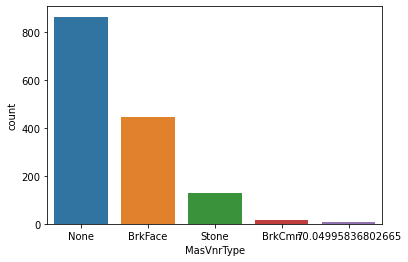

In [38]:
sns.countplot(house['MasVnrType'])

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

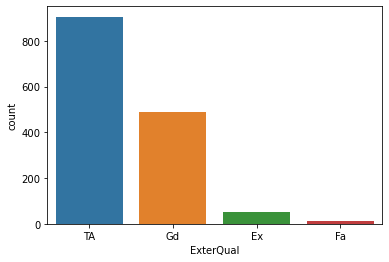

In [39]:
sns.countplot(house['ExterQual'])

<AxesSubplot:xlabel='ExterCond', ylabel='count'>

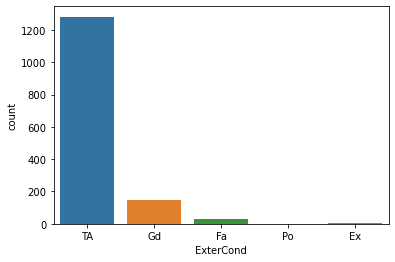

In [40]:
sns.countplot(house['ExterCond'])

<AxesSubplot:xlabel='Foundation', ylabel='count'>

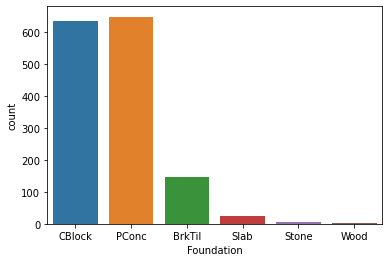

In [41]:
sns.countplot(house['Foundation'])

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

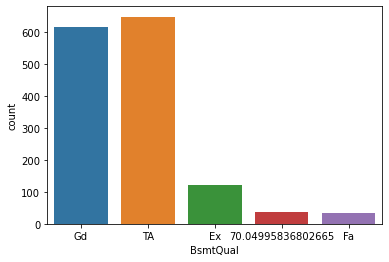

In [42]:
sns.countplot(house['BsmtQual'])

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

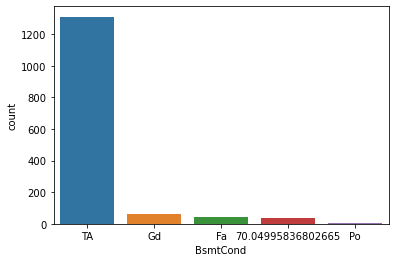

In [43]:
sns.countplot(house['BsmtCond'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

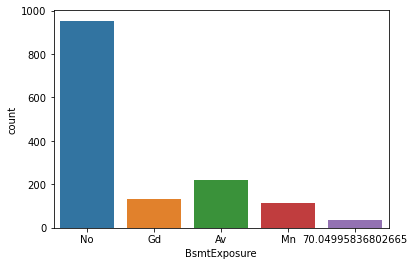

In [44]:
sns.countplot(house['BsmtExposure'])

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

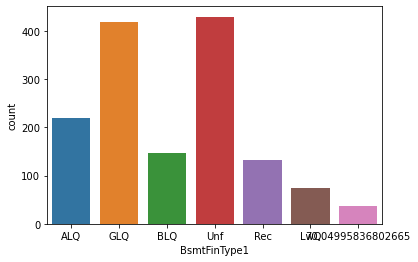

In [45]:
sns.countplot(house['BsmtFinType1'])

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

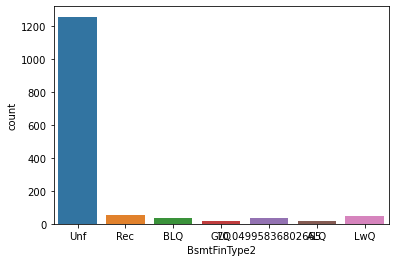

In [46]:
sns.countplot(house['BsmtFinType2'])

<AxesSubplot:xlabel='Heating', ylabel='count'>

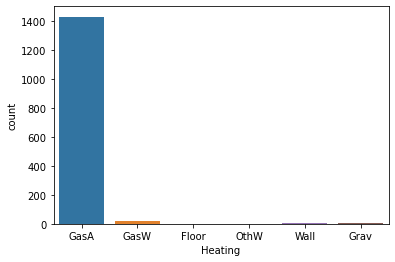

In [47]:
sns.countplot(house['Heating'])

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

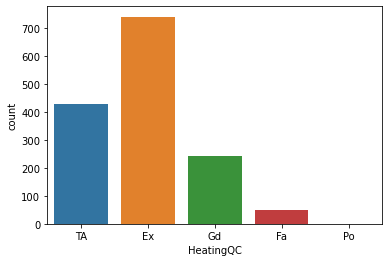

In [48]:
sns.countplot(house['HeatingQC'])

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

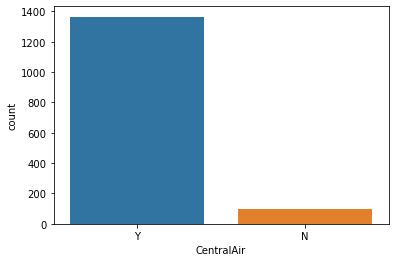

In [49]:
sns.countplot(house['CentralAir'])

<AxesSubplot:xlabel='Electrical', ylabel='count'>

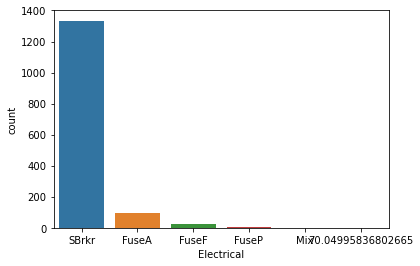

In [50]:
sns.countplot(house['Electrical'])

<AxesSubplot:xlabel='BsmtFullBath', ylabel='count'>

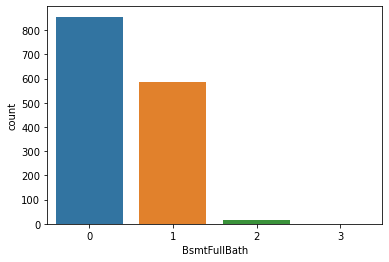

In [51]:
sns.countplot(house['BsmtFullBath'])

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

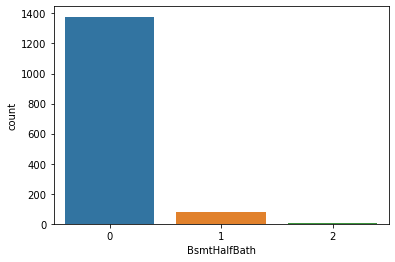

In [52]:
sns.countplot(house['BsmtHalfBath'])

<AxesSubplot:xlabel='FullBath', ylabel='count'>

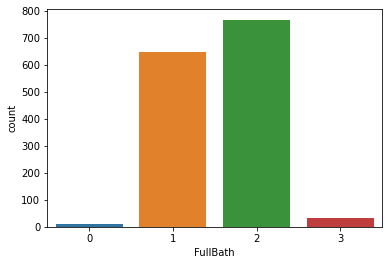

In [53]:
sns.countplot(house['FullBath'])

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

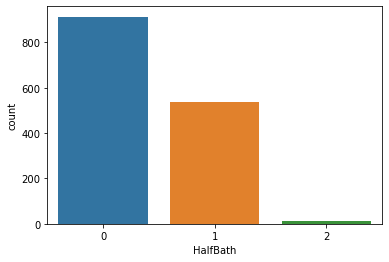

In [54]:
sns.countplot(house['HalfBath'])

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

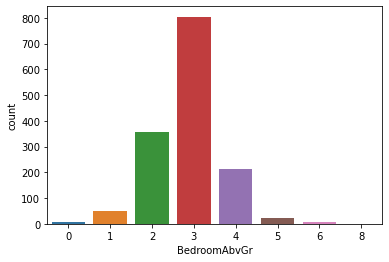

In [55]:
sns.countplot(house['BedroomAbvGr'])

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='count'>

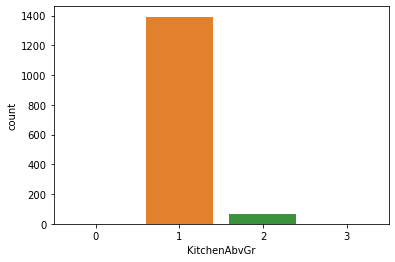

In [56]:
sns.countplot(house['KitchenAbvGr'])

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

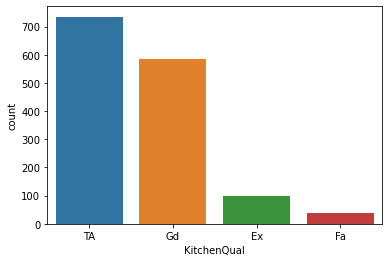

In [57]:
sns.countplot(house['KitchenQual'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

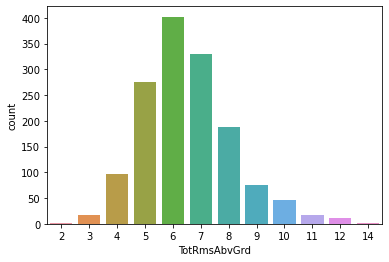

In [58]:
sns.countplot(house['TotRmsAbvGrd'])

<AxesSubplot:xlabel='Functional', ylabel='count'>

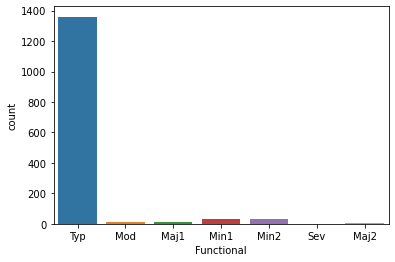

In [59]:
sns.countplot(house['Functional'])

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

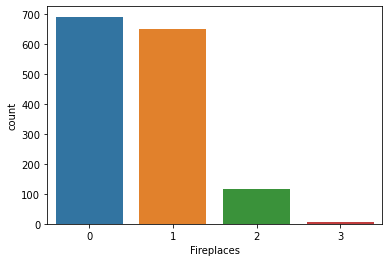

In [60]:
sns.countplot(house['Fireplaces'])

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

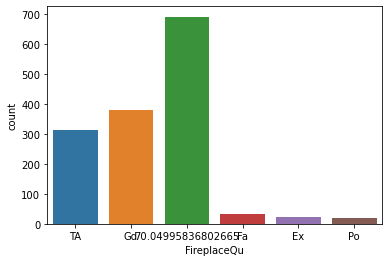

In [61]:
sns.countplot(house['FireplaceQu'])

<AxesSubplot:xlabel='GarageType', ylabel='count'>

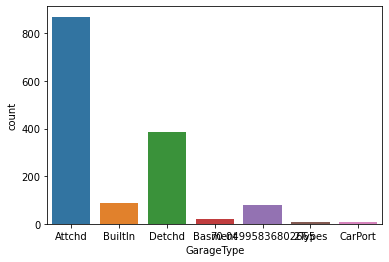

In [62]:
sns.countplot(house['GarageType'])

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

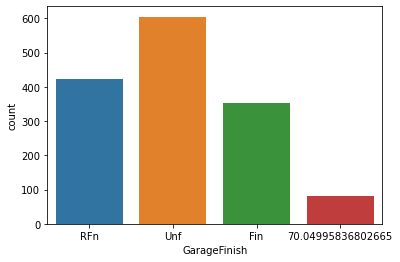

In [63]:
sns.countplot(house['GarageFinish'])

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

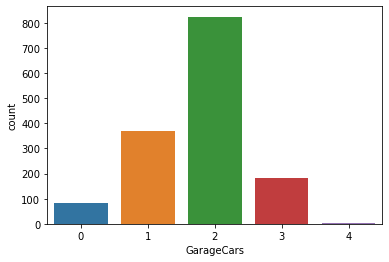

In [64]:
sns.countplot(house['GarageCars'])

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

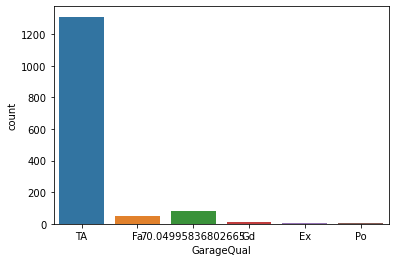

In [65]:
sns.countplot(house['GarageQual'])

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

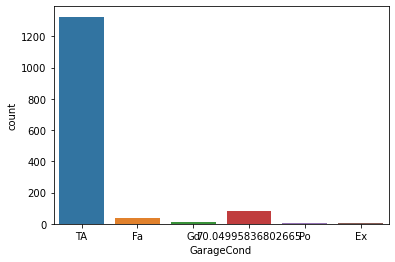

In [66]:
sns.countplot(house['GarageCond'])

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

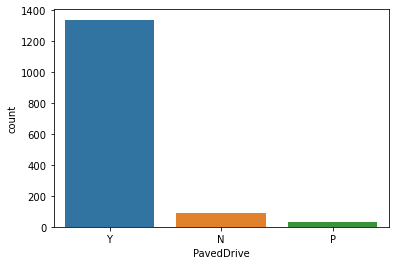

In [67]:
sns.countplot(house['PavedDrive'])

<AxesSubplot:xlabel='PoolArea', ylabel='count'>

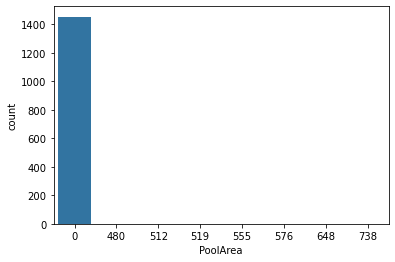

In [68]:
sns.countplot(house['PoolArea'])

<AxesSubplot:xlabel='PoolQC', ylabel='count'>

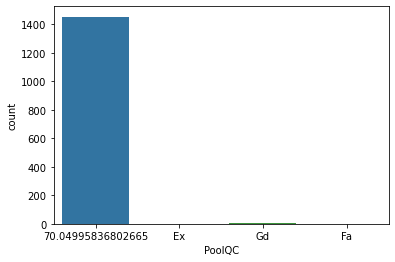

In [69]:
sns.countplot(house['PoolQC'])

<AxesSubplot:xlabel='Fence', ylabel='count'>

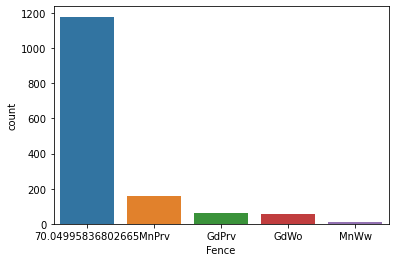

In [70]:
sns.countplot(house['Fence'])

<AxesSubplot:xlabel='MiscFeature', ylabel='count'>

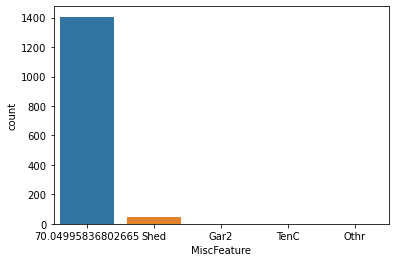

In [71]:
sns.countplot(house['MiscFeature'])

<AxesSubplot:xlabel='MoSold', ylabel='count'>

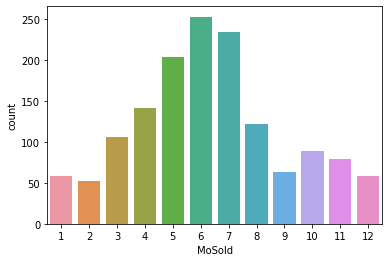

In [72]:
sns.countplot(house['MoSold'])

<AxesSubplot:xlabel='YrSold', ylabel='count'>

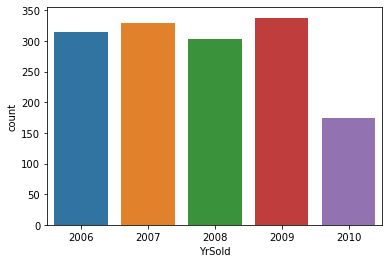

In [73]:
sns.countplot(house['YrSold'])

<AxesSubplot:xlabel='SaleType', ylabel='count'>

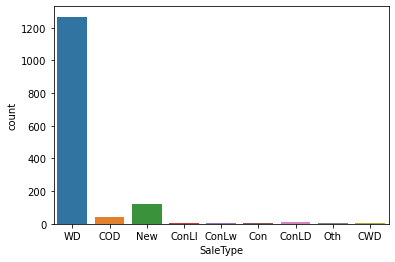

In [74]:
sns.countplot(house['SaleType'])

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

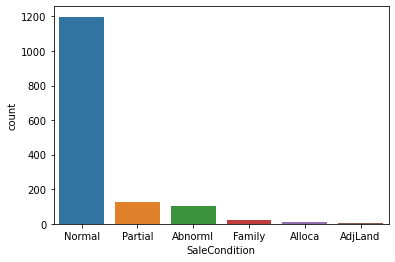

In [75]:
sns.countplot(house['SaleCondition'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

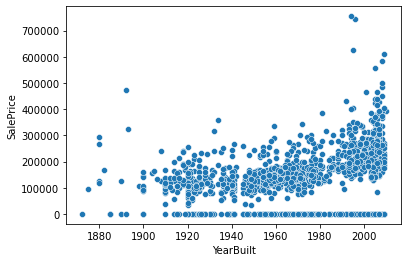

In [76]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=house)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

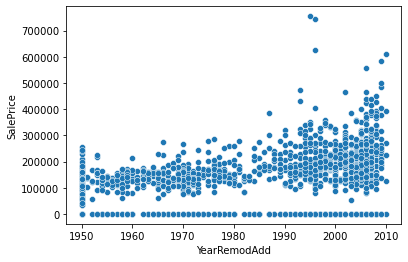

In [77]:
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=house)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

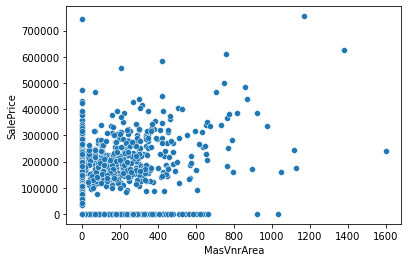

In [78]:
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=house)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

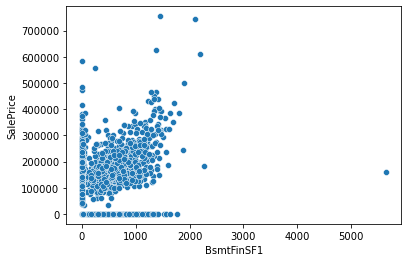

In [79]:
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=house)

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

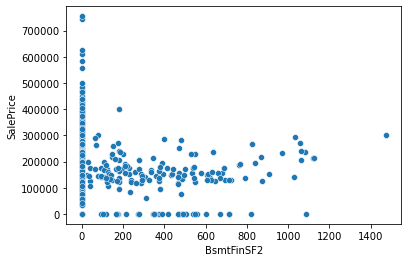

In [80]:
sns.scatterplot(x='BsmtFinSF2',y='SalePrice',data=house)

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

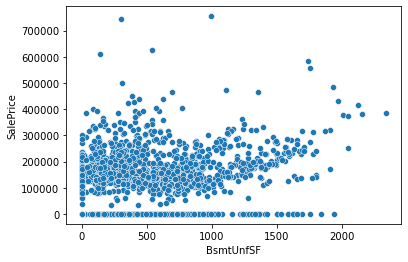

In [81]:
sns.scatterplot(x='BsmtUnfSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

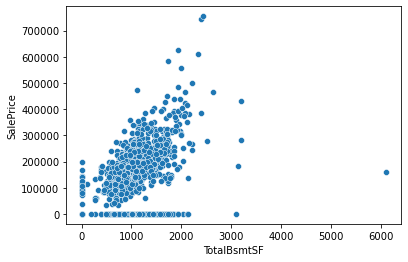

In [82]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

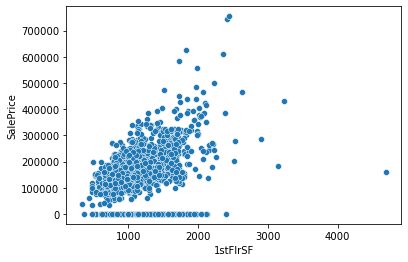

In [83]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

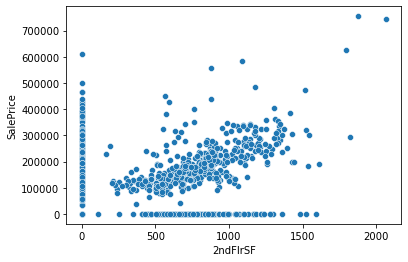

In [84]:
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

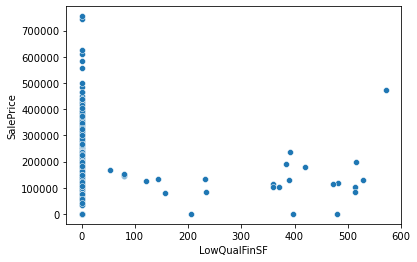

In [85]:
sns.scatterplot(x='LowQualFinSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

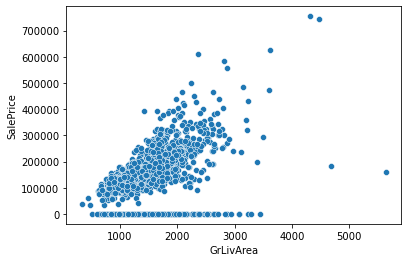

In [86]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=house)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

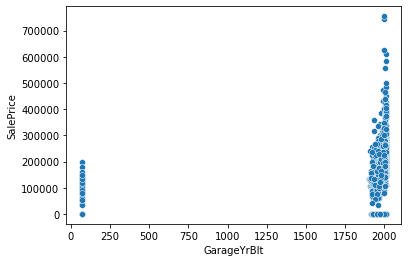

In [87]:
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=house)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

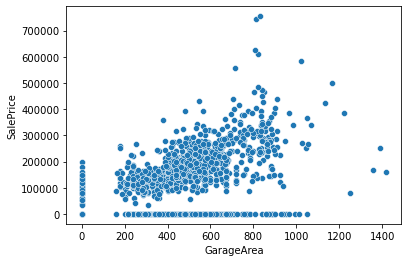

In [88]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=house)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

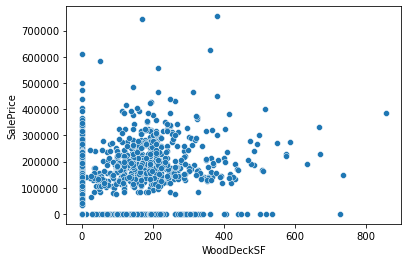

In [89]:
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

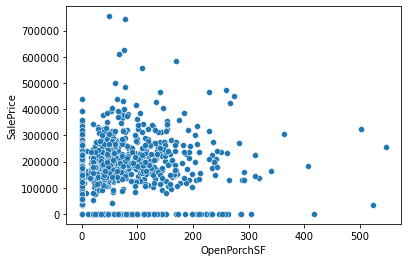

In [90]:
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=house)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

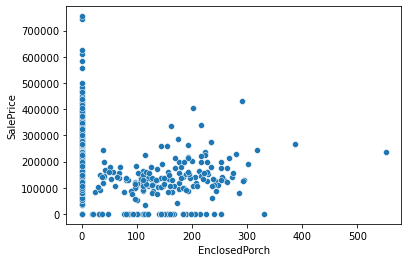

In [91]:
sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=house)

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

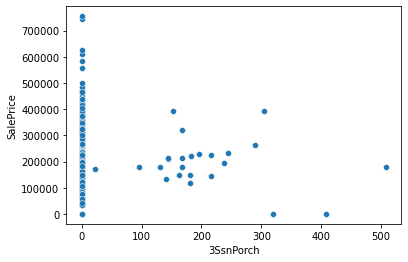

In [92]:
sns.scatterplot(x='3SsnPorch',y='SalePrice',data=house)

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

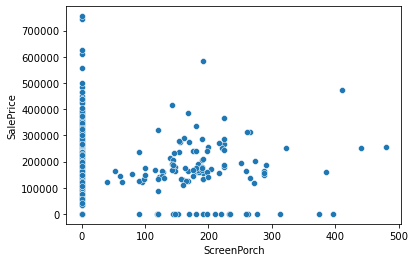

In [93]:
sns.scatterplot(x='ScreenPorch',y='SalePrice',data=house)

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

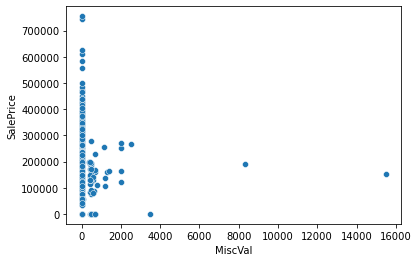

In [94]:
sns.scatterplot(x='MiscVal',y='SalePrice',data=house)

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

house['MSZoning']=le.fit_transform(house['MSZoning'])
house['Street']=le.fit_transform(house['Street'])
house['LotShape']=le.fit_transform(house['LotShape'])
house['LandContour']=le.fit_transform(house['LandContour'])
house['Utilities']=le.fit_transform(house['Utilities'])
house['LotConfig']=le.fit_transform(house['LotConfig'])
house['LandSlope']=le.fit_transform(house['LandSlope'])
house['Neighborhood']=le.fit_transform(house['Neighborhood'])
house['Condition1']=le.fit_transform(house['Condition1'])
house['Condition2']=le.fit_transform(house['Condition2'])
house['BldgType']=le.fit_transform(house['BldgType'])
house['HouseStyle']=le.fit_transform(house['HouseStyle'])
house['RoofStyle']=le.fit_transform(house['RoofStyle'])
house['RoofMatl']=le.fit_transform(house['RoofMatl'])
house['Exterior1st']=le.fit_transform(house['Exterior1st'])
house['Exterior2nd']=le.fit_transform(house['Exterior2nd'])
house['MasVnrType']=le.fit_transform(house['MasVnrType'])
house['ExterQual']=le.fit_transform(house['ExterQual'])
house['ExterCond']=le.fit_transform(house['ExterCond'])
house['Foundation']=le.fit_transform(house['Foundation'])
house['BsmtQual']=le.fit_transform(house['BsmtQual'])
house['BsmtCond']=le.fit_transform(house['BsmtCond'])
house['BsmtExposure']=le.fit_transform(house['BsmtExposure'])
house['BsmtFinType1']=le.fit_transform(house['BsmtFinType1'])
house['BsmtFinTYpe2']=le.fit_transform(house['BsmtFinType2'])
house['Heating']=le.fit_transform(house['Heating'])
house['HeatingQC']=le.fit_transform(house['HeatingQC'])
house['CentralAir']=le.fit_transform(house['CentralAir'])
house['Electrical']=le.fit_transform(house['Electrical'])
house['2ndFlrSF']=le.fit_transform(house['2ndFlrSF'])
house['KitchenQual']=le.fit_transform(house['KitchenQual'])
house['Functional']=le.fit_transform(house['Functional'])
house['FireplaceQu']=le.fit_transform(house['FireplaceQu'])
house['GarageType']=le.fit_transform(house['GarageType'])
house['GarageFinish']=le.fit_transform(house['GarageFinish'])
house['GarageQual']=le.fit_transform(house['GarageQual'])
house['GarageCond']=le.fit_transform(house['GarageCond'])
house['PavedDrive']=le.fit_transform(house['PavedDrive'])
house['PoolQC']=le.fit_transform(house['PoolQC'])
house['Fence']=le.fit_transform(house['Fence'])
house['MiscFeature']=le.fit_transform(house['MiscFeature'])
house['SaleType']=le.fit_transform(house['SaleType'])
house['SaleCondition']=le.fit_transform(house['SaleCondition'])

house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,BsmtFinTYpe2
0,127,120,3,NaN,4928,1,NaN,0,3,0,...,4,4,0,2,2007,8,4,128000.0,train,5
1,889,20,3,95.0,15865,1,NaN,0,3,0,...,4,4,0,10,2007,8,4,268000.0,train,4
2,793,60,3,92.0,9920,1,NaN,0,3,0,...,4,4,0,6,2007,8,4,269790.0,train,5
3,110,20,3,105.0,11751,1,NaN,0,3,0,...,2,4,0,1,2010,0,4,190000.0,train,5
4,422,20,3,NaN,16635,1,NaN,0,3,0,...,4,4,0,6,2009,8,4,215000.0,train,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,3,78.0,10206,1,NaN,3,3,0,...,4,4,0,10,2008,8,4,NaN,test,5
1456,1048,20,3,57.0,9245,1,NaN,1,3,0,...,4,4,0,2,2008,8,4,NaN,test,5
1457,17,20,3,NaN,11241,1,NaN,0,3,0,...,4,2,700,3,2010,8,4,NaN,test,5
1458,523,50,4,50.0,5000,1,NaN,3,3,0,...,4,4,0,10,2006,8,4,NaN,test,5


# Filling NaN values

In [26]:
house=house.replace(np.NaN,house['LotFrontage'].mean())
house=house.replace(np.NaN,house['Alley'].mode())
house=house.replace(np.NaN,house['PoolQC'].mode())
house=house.replace(np.NaN,house['SalePrice'].mean())

# Correlation

In [31]:
cor=house.corr()
cor

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinTYpe2
Id,1.000000,0.011156,-0.006096,-0.009601,-0.033226,0.008916,0.032122,-0.019659,1.332409e-02,0.049756,...,-0.033928,-0.000399,0.037057,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.036351,0.042717
MSSubClass,0.011156,1.000000,0.035900,-0.357056,-0.139781,-0.024969,0.119289,-0.002940,-2.284384e-02,0.075910,...,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.041994,0.042193
MSZoning,-0.006096,0.035900,1.000000,-0.106363,-0.034452,0.087654,0.061887,-0.017854,-1.192034e-03,-0.009895,...,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.117465,-0.028815
LotFrontage,-0.009601,-0.357056,-0.106363,1.000000,0.306795,-0.037323,-0.144931,-0.075647,-8.360070e-17,-0.181253,...,-0.191630,-0.036751,-0.005395,0.001168,0.010158,0.006768,-0.030846,0.058464,0.255843,-0.030297
LotArea,-0.033226,-0.139781,-0.034452,0.306795,1.000000,-0.197131,-0.165315,-0.149083,1.012318e-02,-0.121161,...,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.135165,-0.070658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YrSold,0.000712,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.036449,0.020507,2.335254e-02,-0.005992,...,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.040265,-0.024237
SaleType,0.019773,0.012464,0.097437,-0.030846,0.012292,0.014339,-0.000911,-0.025754,-1.267697e-01,0.014325,...,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.076746,-0.011938
SaleCondition,-0.005806,-0.024940,0.009494,0.058464,0.034169,0.006064,-0.038118,0.033809,-8.970068e-02,0.051579,...,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.135060,0.031894
SalePrice,-0.036351,-0.041994,-0.117465,0.255843,0.135165,0.040848,-0.159437,0.013632,-3.749641e-02,-0.051356,...,-0.121127,0.053069,0.037863,0.002114,0.056928,-0.040265,-0.076746,0.135060,1.000000,0.001552


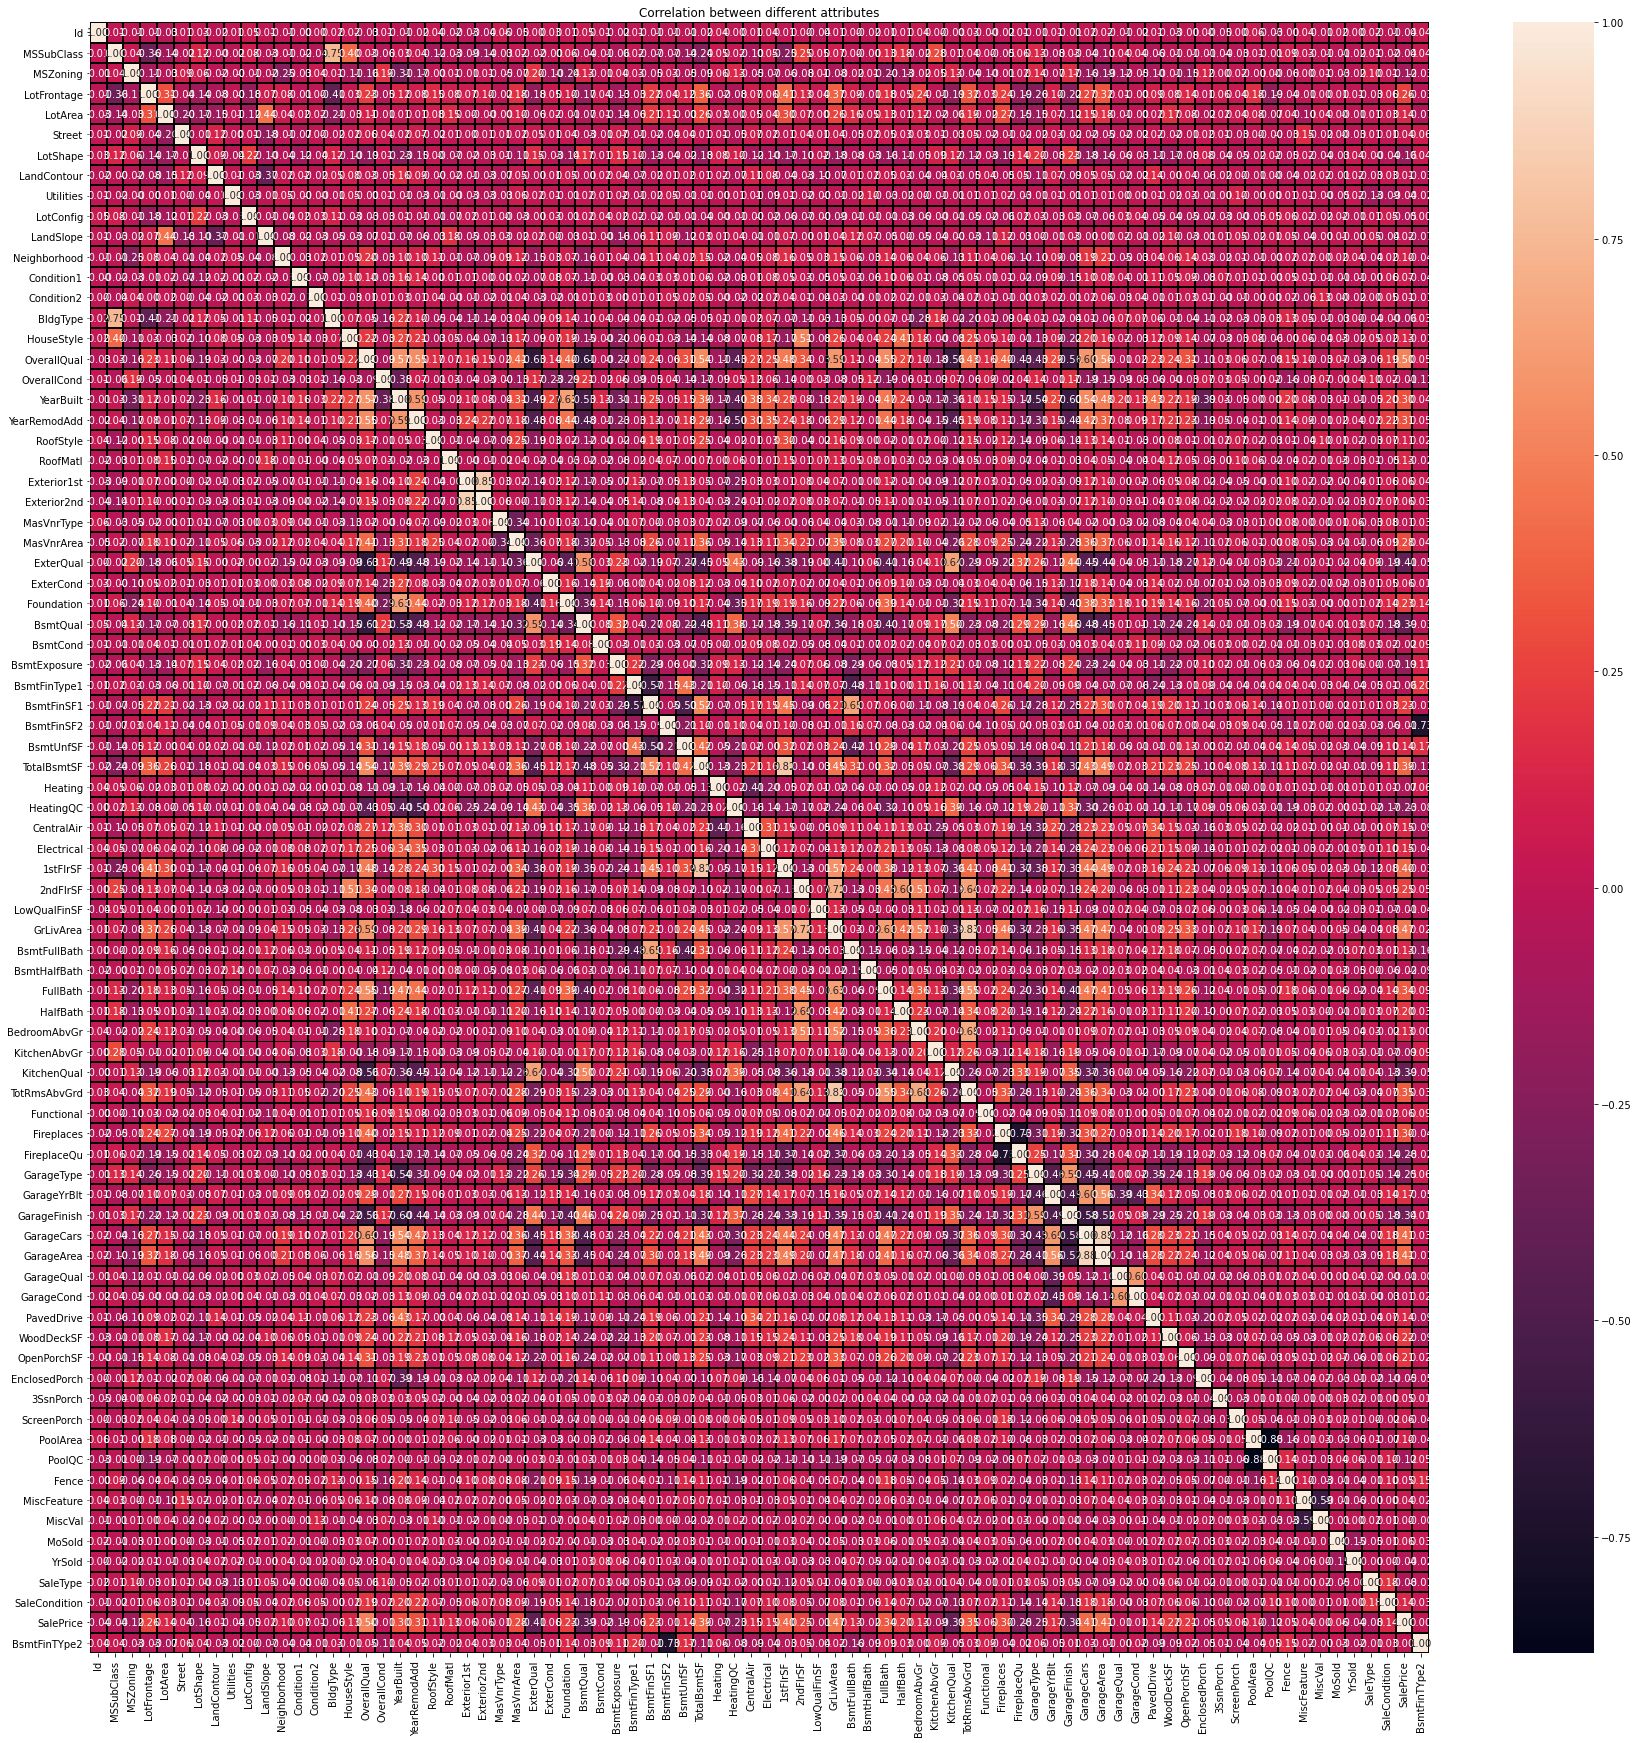

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True,linewidth=1,linecolor='black',fmt='.2f')
plt.title("Correlation between different attributes")
plt.show()

In [33]:
cor['SalePrice']

Id              -0.036351
MSSubClass      -0.041994
MSZoning        -0.117465
LotFrontage      0.255843
LotArea          0.135165
                   ...   
YrSold          -0.040265
SaleType        -0.076746
SaleCondition    0.135060
SalePrice        1.000000
BsmtFinTYpe2     0.001552
Name: SalePrice, Length: 80, dtype: float64

# Describe of Dataset

In [34]:
house.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinTYpe2
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,70.049958,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,...,2.991096,3.504795,3.922603,43.489041,6.321918,2007.815753,7.513014,3.770548,145195.614786,4.741781
std,421.610009,42.300571,0.632017,22.024023,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,...,0.140703,1.082912,0.404103,496.123024,2.703626,1.328095,1.552100,1.100854,101362.042033,0.946713
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,70.049958,0.000000
25%,365.750000,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,...,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,94937.500000,5.000000
50%,730.500000,50.000000,3.000000,70.049958,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,...,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,144076.000000,5.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,...,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,196250.000000,5.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000,6.000000


Describe of Dataset using heatmap:

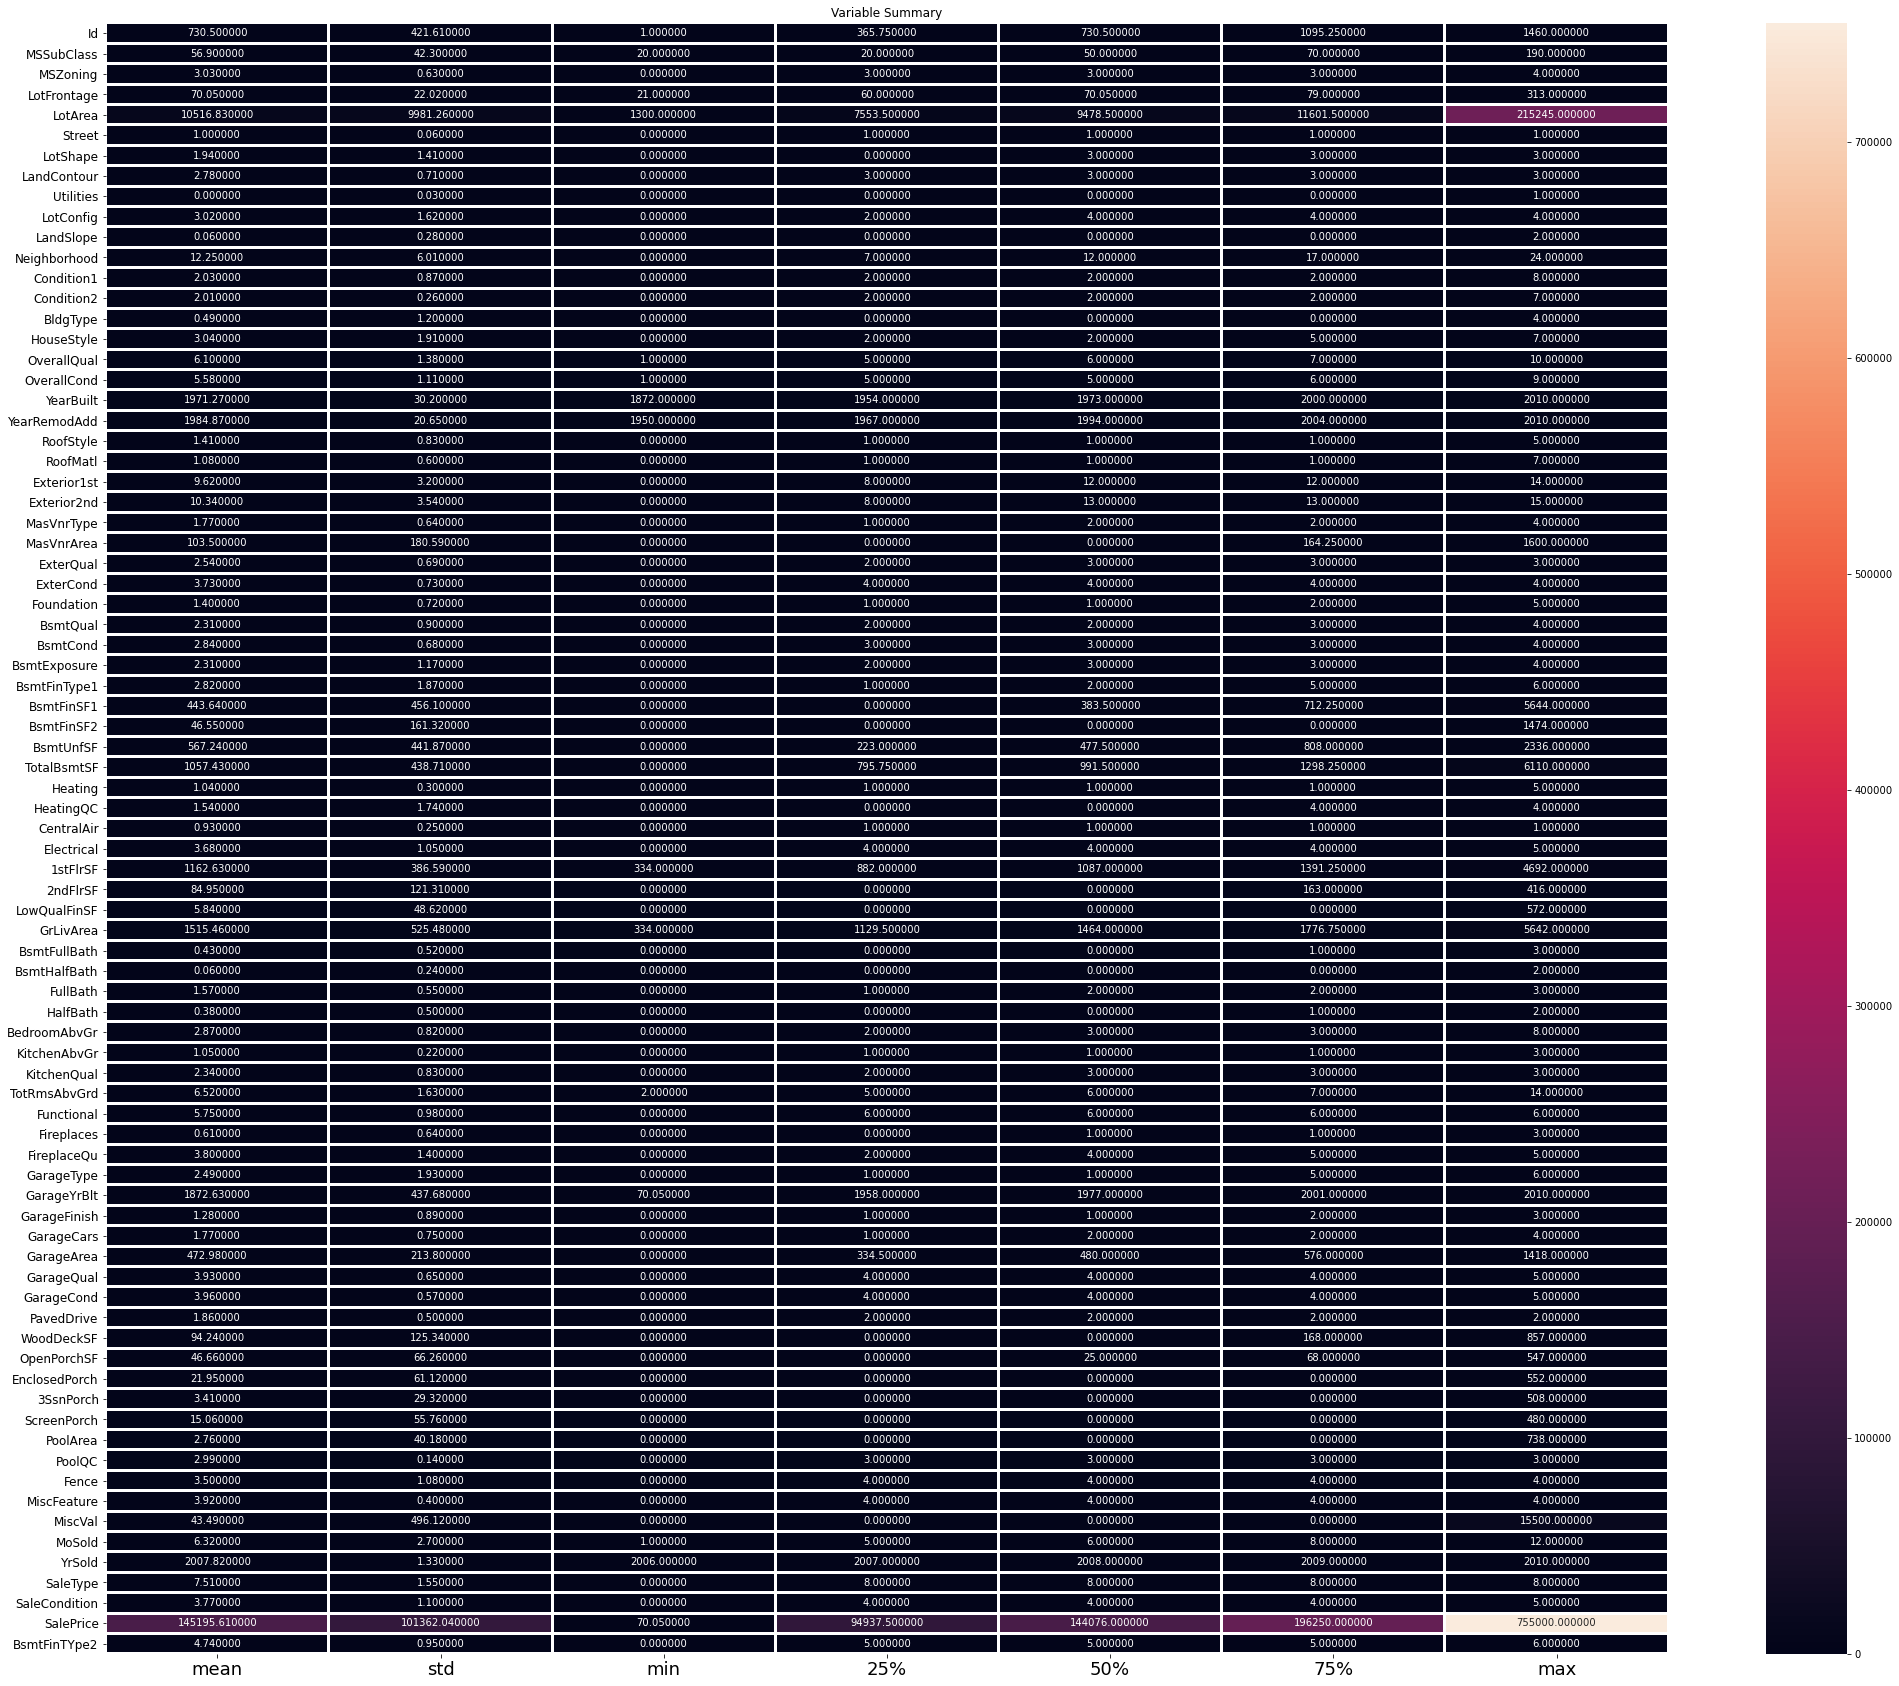

In [35]:
plt.figure(figsize=(35,30))
sns.heatmap(round(house.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

From the above observation we can determine mean, standard deviation, minimum and maximum value of each column

In [36]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Outliers Checking

<AxesSubplot:xlabel='Id'>

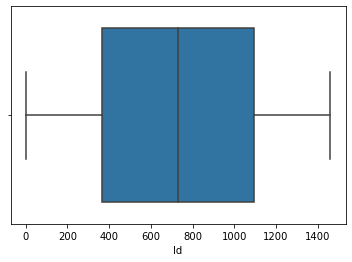

In [31]:
sns.boxplot(house['Id'])

<AxesSubplot:xlabel='MSSubClass'>

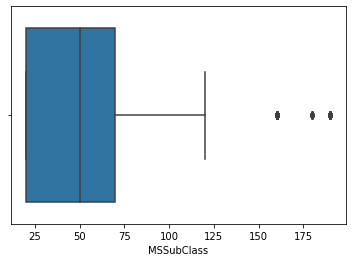

In [34]:
sns.boxplot(house['MSSubClass'])

<AxesSubplot:xlabel='MSZoning'>

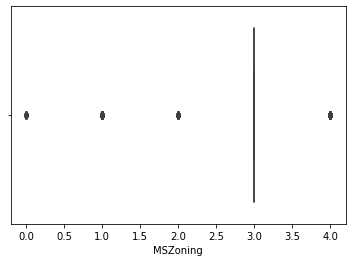

In [35]:
sns.boxplot(house['MSZoning'])

<AxesSubplot:xlabel='Street'>

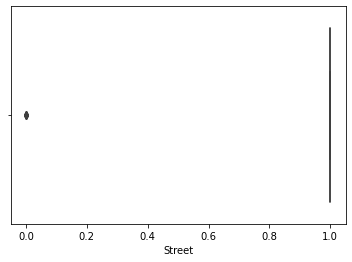

In [36]:
sns.boxplot(house['Street'])

<AxesSubplot:xlabel='Utilities'>

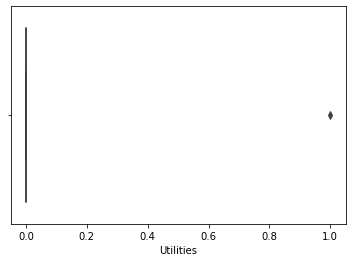

In [41]:
sns.boxplot(house['Utilities'])

<AxesSubplot:xlabel='LandSlope'>

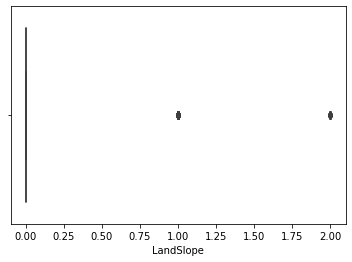

In [40]:
sns.boxplot(house['LandSlope'])

<AxesSubplot:xlabel='Neighborhood'>

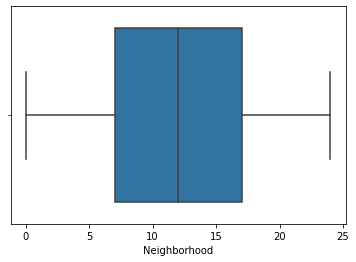

In [42]:
sns.boxplot(house['Neighborhood'])

<AxesSubplot:xlabel='BldgType'>

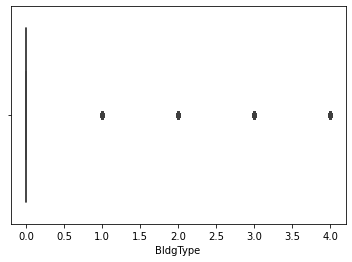

In [43]:
sns.boxplot(house['BldgType'])

<AxesSubplot:xlabel='Exterior1st'>

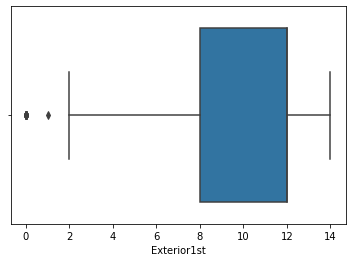

In [44]:
sns.boxplot(house['Exterior1st'])

<AxesSubplot:xlabel='Foundation'>

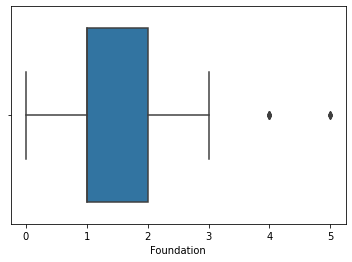

In [45]:
sns.boxplot(house['Foundation'])

<AxesSubplot:xlabel='CentralAir'>

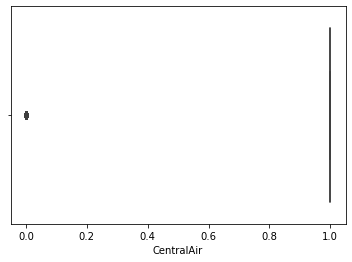

In [46]:
sns.boxplot(house['CentralAir'])

<AxesSubplot:xlabel='Electrical'>

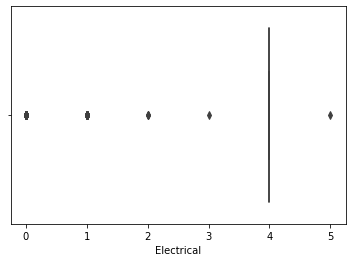

In [47]:
sns.boxplot(house['Electrical'])

<AxesSubplot:xlabel='Fence'>

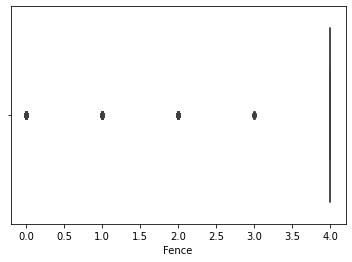

In [48]:
sns.boxplot(house['Fence'])

<AxesSubplot:xlabel='Functional'>

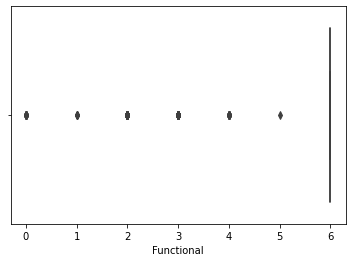

In [49]:
sns.boxplot(house['Functional'])

<AxesSubplot:xlabel='FireplaceQu'>

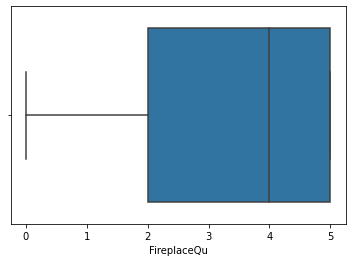

In [50]:
sns.boxplot(house['FireplaceQu'])

<AxesSubplot:xlabel='GarageQual'>

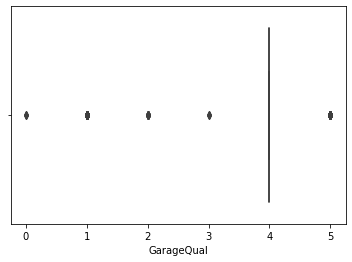

In [51]:
sns.boxplot(house['GarageQual'])

<AxesSubplot:xlabel='PavedDrive'>

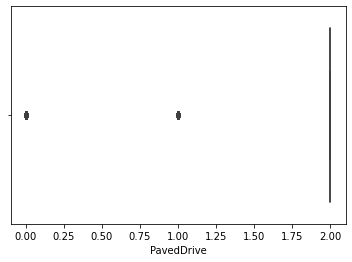

In [52]:
sns.boxplot(house['PavedDrive'])

<AxesSubplot:xlabel='MiscVal'>

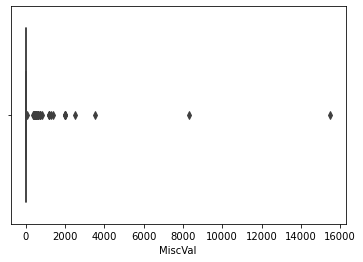

In [53]:
sns.boxplot(house['MiscVal'])

<AxesSubplot:xlabel='SalePrice'>

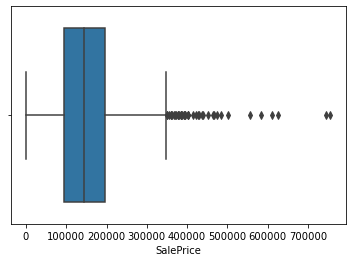

In [54]:
sns.boxplot(house['SalePrice'])

# Normal Distribution Curve:

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

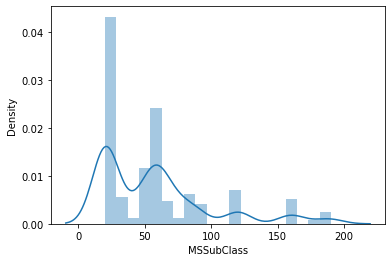

In [61]:
sns.distplot(house['MSSubClass'])

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

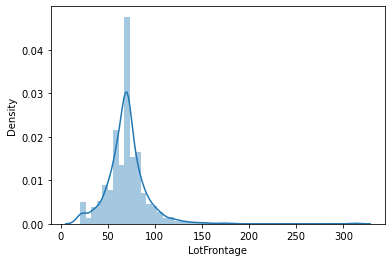

In [62]:
sns.distplot(house['LotFrontage'])

<AxesSubplot:xlabel='LotShape', ylabel='Density'>

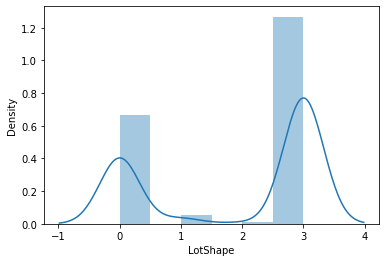

In [64]:
sns.distplot(house['LotShape'])

<AxesSubplot:xlabel='Utilities', ylabel='Density'>

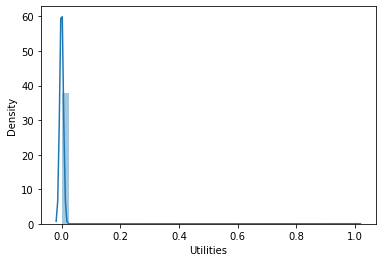

In [66]:
sns.distplot(house['Utilities'])

<AxesSubplot:xlabel='LotConfig', ylabel='Density'>

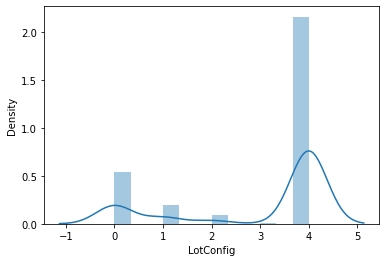

In [68]:
sns.distplot(house['LotConfig'])

<AxesSubplot:xlabel='LandSlope', ylabel='Density'>

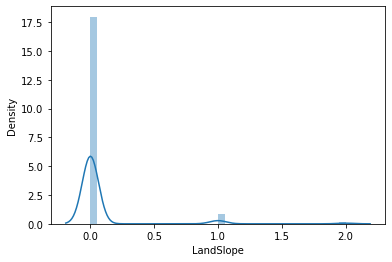

In [69]:
sns.distplot(house['LandSlope'])

<AxesSubplot:xlabel='BldgType', ylabel='Density'>

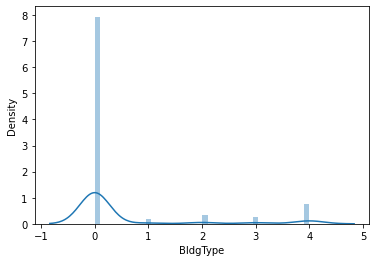

In [70]:
sns.distplot(house['BldgType'])

<AxesSubplot:xlabel='RoofStyle', ylabel='Density'>

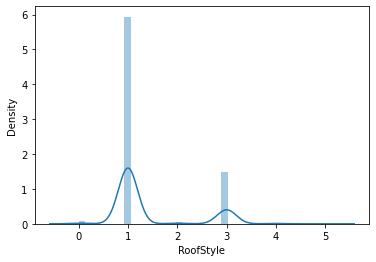

In [71]:
sns.distplot(house['RoofStyle'])

<AxesSubplot:xlabel='Exterior2nd', ylabel='Density'>

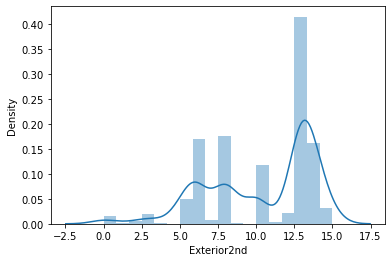

In [72]:
sns.distplot(house['Exterior2nd'])

<AxesSubplot:xlabel='ExterCond', ylabel='Density'>

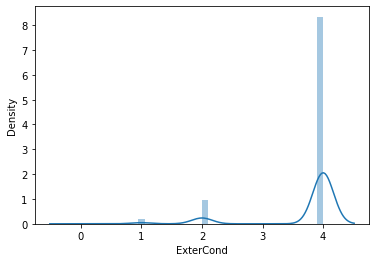

In [73]:
sns.distplot(house['ExterCond'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='Density'>

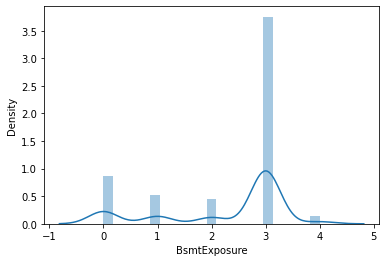

In [74]:
sns.distplot(house['BsmtExposure'])

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Density'>

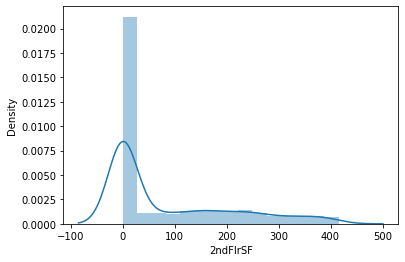

In [75]:
sns.distplot(house['2ndFlrSF'])

<AxesSubplot:xlabel='KitchenQual', ylabel='Density'>

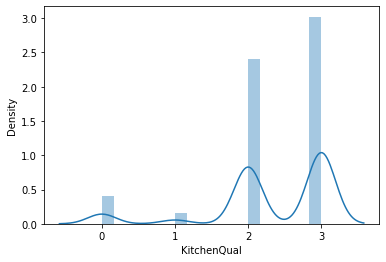

In [76]:
sns.distplot(house['KitchenQual'])

<AxesSubplot:xlabel='Functional', ylabel='Density'>

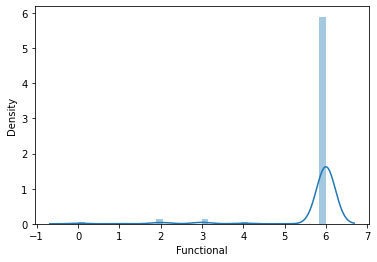

In [77]:
sns.distplot(house['Functional'])

<AxesSubplot:xlabel='GarageType', ylabel='Density'>

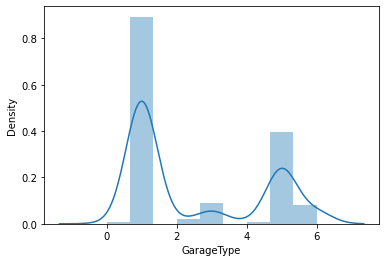

In [78]:
sns.distplot(house['GarageType'])

<AxesSubplot:xlabel='GarageCond', ylabel='Density'>

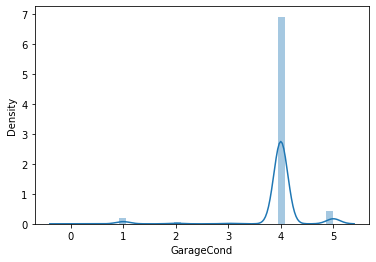

In [79]:
sns.distplot(house['GarageCond'])

<AxesSubplot:xlabel='PoolQC', ylabel='Density'>

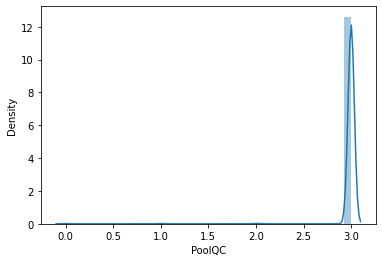

In [80]:
sns.distplot(house['PoolQC'])

<AxesSubplot:xlabel='SaleCondition', ylabel='Density'>

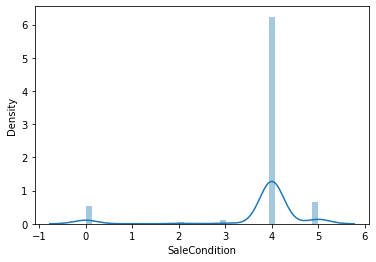

In [81]:
sns.distplot(house['SaleCondition'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

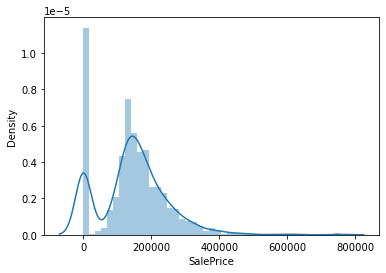

In [82]:
sns.distplot(house['SalePrice'])

The columns in the dataset are not normalized. The building blocks are out of the normalized curve.

# Skewness:

In [37]:
skw=house.skew()
skw

Id                0.000000
MSSubClass        1.407657
MSZoning         -1.735395
LotFrontage       2.384950
LotArea          12.207688
                   ...    
YrSold            0.096269
SaleType         -3.868638
SaleCondition    -2.741167
SalePrice         0.715012
BsmtFinTYpe2     -3.406104
Length: 80, dtype: float64

# Data Cleaning:

In [38]:
house=house.drop(["Id","Alley","BsmtFinType2"],axis=1)

In [39]:
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,BsmtFinTYpe2
0,120,3,70.049958,4928,1,0,3,0,4,0,...,4,4,0,2,2007,8,4,128000.000000,train,5
1,20,3,95.000000,15865,1,0,3,0,4,1,...,4,4,0,10,2007,8,4,268000.000000,train,4
2,60,3,92.000000,9920,1,0,3,0,1,0,...,4,4,0,6,2007,8,4,269790.000000,train,5
3,20,3,105.000000,11751,1,0,3,0,4,0,...,2,4,0,1,2010,0,4,190000.000000,train,5
4,20,3,70.049958,16635,1,0,3,0,2,0,...,4,4,0,6,2009,8,4,215000.000000,train,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.000000,10206,1,3,3,0,4,0,...,4,4,0,10,2008,8,4,70.049958,test,5
1456,20,3,57.000000,9245,1,1,3,0,4,0,...,4,4,0,2,2008,8,4,70.049958,test,5
1457,20,3,70.049958,11241,1,0,3,0,1,0,...,4,2,700,3,2010,8,4,70.049958,test,5
1458,50,4,50.000000,5000,1,3,3,0,0,0,...,4,4,0,10,2006,8,4,70.049958,test,5


In [40]:
train=house.loc[house['source']=='train']
test=house.loc[house['source']=='test']

In [41]:
train=train.drop(["source"],axis=1)

In [42]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinTYpe2
0,120,3,70.049958,4928,1,0,3,0,4,0,...,3,4,4,0,2,2007,8,4,128000.0,5
1,20,3,95.000000,15865,1,0,3,0,4,1,...,3,4,4,0,10,2007,8,4,268000.0,4
2,60,3,92.000000,9920,1,0,3,0,1,0,...,3,4,4,0,6,2007,8,4,269790.0,5
3,20,3,105.000000,11751,1,0,3,0,4,0,...,3,2,4,0,1,2010,0,4,190000.0,5
4,20,3,70.049958,16635,1,0,3,0,2,0,...,3,4,4,0,6,2009,8,4,215000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,70.049958,9819,1,0,3,0,4,0,...,3,2,4,0,2,2010,8,4,122000.0,5
1164,20,3,67.000000,8777,1,3,3,0,4,0,...,3,2,4,0,5,2009,8,4,108000.0,6
1165,160,3,24.000000,2280,1,3,3,0,2,0,...,3,4,4,0,7,2009,8,4,148500.0,5
1166,70,0,50.000000,8500,1,3,3,0,4,0,...,3,2,4,0,7,2008,8,4,40000.0,5


In [43]:
test=test.drop(["source","SalePrice"],axis=1)

In [44]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFinTYpe2
1168,20,3,86.000000,14157,1,0,1,0,0,0,...,0,3,4,4,0,7,2007,8,4,5
1169,120,3,70.049958,5814,1,0,3,0,1,0,...,0,3,4,4,0,8,2009,0,0,5
1170,20,3,70.049958,11838,1,3,3,0,4,0,...,0,3,4,4,0,6,2009,8,4,5
1171,70,3,75.000000,12000,1,3,0,0,4,0,...,0,3,4,4,0,7,2009,8,4,5
1172,60,3,86.000000,14598,1,0,3,0,1,0,...,0,3,4,4,0,1,2008,8,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.000000,10206,1,3,3,0,4,0,...,0,3,4,4,0,10,2008,8,4,5
1456,20,3,57.000000,9245,1,1,3,0,4,0,...,0,3,4,4,0,2,2008,8,4,5
1457,20,3,70.049958,11241,1,0,3,0,1,0,...,0,3,4,2,700,3,2010,8,4,5
1458,50,4,50.000000,5000,1,3,3,0,0,0,...,0,3,4,4,0,10,2006,8,4,5


In [45]:
house=house.drop(["source"],axis=1)
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinTYpe2
0,120,3,70.049958,4928,1,0,3,0,4,0,...,3,4,4,0,2,2007,8,4,128000.000000,5
1,20,3,95.000000,15865,1,0,3,0,4,1,...,3,4,4,0,10,2007,8,4,268000.000000,4
2,60,3,92.000000,9920,1,0,3,0,1,0,...,3,4,4,0,6,2007,8,4,269790.000000,5
3,20,3,105.000000,11751,1,0,3,0,4,0,...,3,2,4,0,1,2010,0,4,190000.000000,5
4,20,3,70.049958,16635,1,0,3,0,2,0,...,3,4,4,0,6,2009,8,4,215000.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.000000,10206,1,3,3,0,4,0,...,3,4,4,0,10,2008,8,4,70.049958,5
1456,20,3,57.000000,9245,1,1,3,0,4,0,...,3,4,4,0,2,2008,8,4,70.049958,5
1457,20,3,70.049958,11241,1,0,3,0,1,0,...,3,4,2,700,3,2010,8,4,70.049958,5
1458,50,4,50.000000,5000,1,3,3,0,0,0,...,3,4,4,0,10,2006,8,4,70.049958,5


# Removing Outliers:

# z-Score Technique

In [46]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(house))
z.shape

(1460, 79)

In [47]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1456, 1457, 1459], dtype=int64), array([ 9, 20, 33, ..., 45, 71, 29], dtype=int64))


In [48]:
house_new=house[(z<3).all(axis=1)]
print(house.shape)
print(house_new.shape)

(1460, 79)
(562, 79)


Percentage Data Loss

In [49]:
percentage_loss=(1460-562)/1460*100
print(percentage_loss)

61.50684931506849


# IQR Technique:

In [50]:
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSSubClass           50.0
MSZoning              0.0
LotFrontage          19.0
LotArea            4048.0
Street                0.0
                   ...   
YrSold                2.0
SaleType              0.0
SaleCondition         0.0
SalePrice        101312.5
BsmtFinTYpe2          0.0
Length: 79, dtype: float64


In [51]:
house_new1= house[~((house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))).any(axis=1)]
print(house.shape)
print(house_new1.shape)

(1460, 79)
(111, 79)


Percentage Data Loss

In [52]:
percentage_loss=((1460-111)/1460)*100
print(percentage_loss)

92.3972602739726


The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing Data in features and vector:

In [53]:
x_train=train
y_train=train['SalePrice']
x_test=test

# Transform data to remove skewness

In [54]:
from sklearn.preprocessing import power_transform
x_train=power_transform(x_train,method='yeo-johnson')

In [55]:
x_train

array([[ 1.37043472, -0.16245555,  0.05916793, ...,  0.02973497,
        -0.67135266,  0.18704964],
       [-1.16799937, -0.16245555,  1.12541932, ...,  0.02973497,
         1.18117384, -1.58139389],
       [ 0.4900471 , -0.16245555,  1.00738991, ...,  0.02973497,
         1.19758737,  0.18704964],
       ...,
       [ 1.70079775, -0.16245555, -2.85828421, ...,  0.02973497,
        -0.2940318 ,  0.18704964],
       [ 0.69655685, -2.92646435, -0.98867955, ...,  0.02973497,
        -3.71339385,  0.18704964],
       [ 0.4900471 , -0.16245555,  0.05916793, ...,  0.02973497,
         0.23510859,  0.18704964]])

# Standard Scaler:

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[ 1.37043472, -0.16245555,  0.05916793, ...,  0.02973497,
        -0.67135266,  0.18704964],
       [-1.16799937, -0.16245555,  1.12541932, ...,  0.02973497,
         1.18117384, -1.58139389],
       [ 0.4900471 , -0.16245555,  1.00738991, ...,  0.02973497,
         1.19758737,  0.18704964],
       ...,
       [ 1.70079775, -0.16245555, -2.85828421, ...,  0.02973497,
        -0.2940318 ,  0.18704964],
       [ 0.69655685, -2.92646435, -0.98867955, ...,  0.02973497,
        -3.71339385,  0.18704964],
       [ 0.4900471 , -0.16245555,  0.05916793, ...,  0.02973497,
         0.23510859,  0.18704964]])

# MODEL BUILDING:

# Linear Regression:

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [60]:
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,1)==round(r2_score(ytest,pred_test)*100,1):
        print("At random state:",i)
        print("Training r2_score is:",r2_score(ytrain,pred_train*100))
        print("Testing r2_score is:",r2_score(ytest,pred_test*100))

At random state: 147
Training r2_score is: -59417.0478890466
Testing r2_score is: -69027.53846713796
At random state: 268
Training r2_score is: -58428.76212128599
Testing r2_score is: -79435.33482249668
At random state: 363
Training r2_score is: -57700.14882384501
Testing r2_score is: -80692.0163756377
At random state: 493
Training r2_score is: -62168.788203788616
Testing r2_score is: -56159.8948983885
At random state: 527
Training r2_score is: -59287.609420574605
Testing r2_score is: -70513.09679781318
At random state: 609
Training r2_score is: -60488.62743069326
Testing r2_score is: -61786.46285730607
At random state: 621
Training r2_score is: -59557.08740908054
Testing r2_score is: -69136.68063053321
At random state: 719
Training r2_score is: -61061.34173833105
Testing r2_score is: -58816.622739524035
At random state: 728
Training r2_score is: -58454.53036405759
Testing r2_score is: -74117.18443561198
At random state: 918
Training r2_score is: -58516.23904429575
Testing r2_score is:

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [63]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 14754.328258407004
Mean Squared Error: 827387499.7980477
Root Mean Square Error: 28764.3442441862


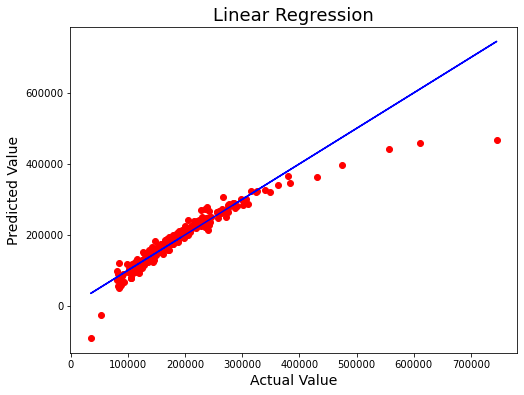

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

We can see that the values does not lie on the linear line. We will approach more regressors

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.20,random_state=609)

We will use random state=609

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Regularization

# 1.Lasso:

In [68]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [69]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_train,y_train,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 89.14570670122573
R2_score is :- 92.46621887992643


At cv:- 3
Cross validation score is:- 89.53788279285376
R2_score is :- 92.46621887992643


At cv:- 4
Cross validation score is:- 89.52195409309805
R2_score is :- 92.46621887992643


At cv:- 5
Cross validation score is:- 89.27464206861346
R2_score is :- 92.46621887992643


At cv:- 6
Cross validation score is:- 90.1097405609261
R2_score is :- 92.46621887992643


At cv:- 7
Cross validation score is:- 90.40630444610525
R2_score is :- 92.46621887992643


At cv:- 8
Cross validation score is:- 90.22869105762676
R2_score is :- 92.46621887992643


At cv:- 9
Cross validation score is:- 90.51101024724554
R2_score is :- 92.46621887992643




In [70]:
print("At cv:",9)
print("Cross validation score is:",90.51101024724554)
print("R2_Score is:",92.46621887992643)

At cv: 9
Cross validation score is: 90.51101024724554
R2_Score is: 92.46621887992643


The value of cv is taken as 9

In [71]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 13167.466673087569
Mean Squared Error: 470307411.6561791
Root Mean Square Error: 21686.572150899716


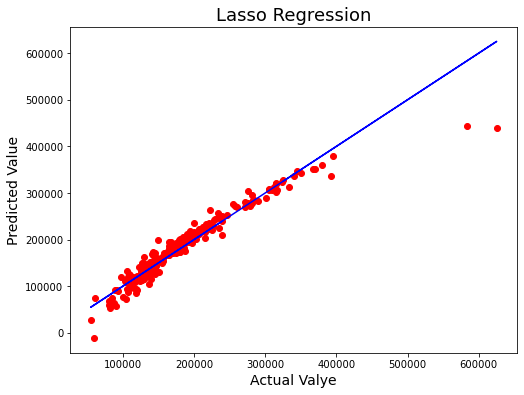

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Valye',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

The above results shows that the datapoints near the best fit line and not on it. Trying model testing with different algorithm.

# 2.Ridge:

In [73]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [74]:
rd = Ridge(alpha=1, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)

rds = r2_score(ytest,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x_train,y_train,cv=9)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 92.44155097677849
Cross Val Score: 90.5042013640202


In [75]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 13205.60908716168
Mean Squared Error: 471847341.9376126
Root Mean Square Error: 21722.047369840915


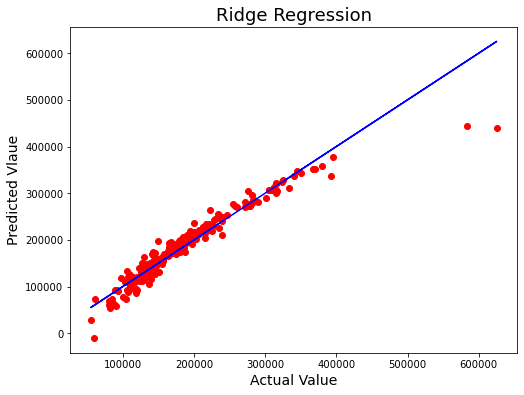

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


The above results shows that the datapoints near the best fit line and not on it. Trying model testing with different algorithm.

# Approaching more Regressors:

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

# 1.Decision Tree Regressor:

In [80]:
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(xtrain,ytrain)
dtr.score(xtrain,ytrain)
pred_dtr = dtr.predict(xtest)

dtr_r2 = r2_score(ytest,pred_rd)
print('R2 Score:',dtr_r2*100)

dtrscore = cross_val_score(dtr,x_train,y_train,cv=9)
dtrcc = dtrscore.mean() 
print('Cross Val Score:',dtrcc*100)

R2 Score: 92.44155097677849
Cross Val Score: 98.86345825700474


In [81]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_dtr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_dtr)))

Error:
Mean Absolute Error: 1343.8333333333333
Mean Squared Error: 78580975.79059829
Root Mean Square Error: 8864.591123712265


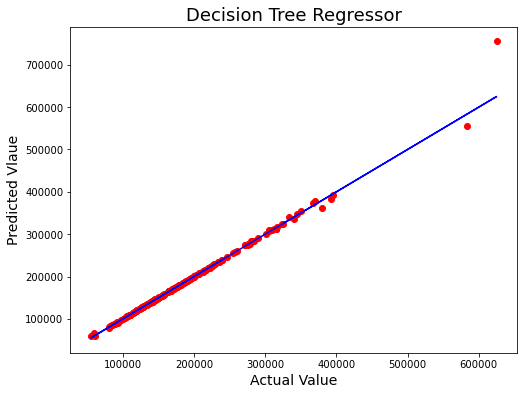

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_dtr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

We can see that the values does not lie on the linear line. We will approach more regressors.

# 2. KNeighbors Regressor:

In [83]:
knr=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
knr.fit(xtrain,ytrain)
knr.score(xtrain,ytrain)
pred_knr = knr.predict(xtest)

knr_r2 = r2_score(ytest,pred_knr)
print('R2 Score:',knr_r2*100)

knrscore = cross_val_score(knr,x_train,y_train,cv=9)
knrcc = knrscore.mean() 
print('Cross Val Score:',knrcc*100)

R2 Score: 79.27323952837952
Cross Val Score: 77.40144312312718


In [84]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_knr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_knr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_knr)))

Error:
Mean Absolute Error: 22612.809401709404
Mean Squared Error: 1293898629.925983
Root Mean Square Error: 35970.802464304055


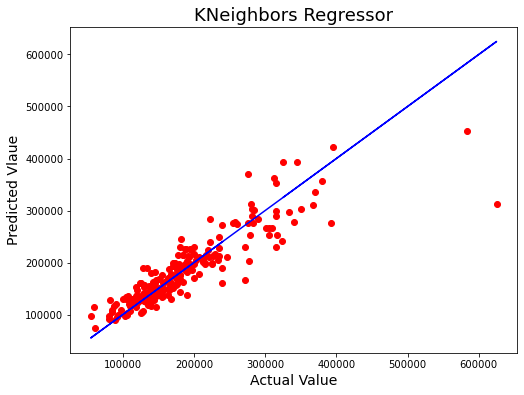

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_knr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

The above results shows that the datapoints near the best fit line and not on it. Trying model testing with different algorithm.

# 3.SVR:

In [86]:
svr=SVR()
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_svr = svr.predict(xtest)

svr_r2 = r2_score(ytest,pred_svr)
print('R2 Score:',svr_r2*100)

svr_score = cross_val_score(svr,x_train,y_train,cv=9)
svr_cc = svr_score.mean() 
print('Cross Val Score:',svr_cc*100)

R2 Score: -6.2576784327745605
Cross Val Score: -5.482660466729569


In [87]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_svr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_svr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_svr)))

Error:
Mean Absolute Error: 55132.57942190695
Mean Squared Error: 6633292488.304302
Root Mean Square Error: 81445.02740072166


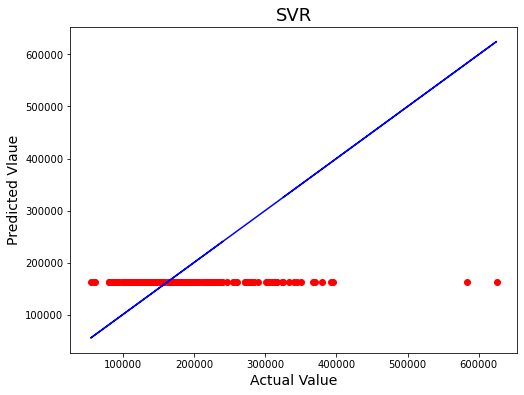

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_svr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SVR',fontsize=18)
plt.show()

We can see that the values does not lie on the linear line. We will approach more regressors.

# 4.SGD Regressor:

In [89]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
sgd.score(xtrain,ytrain)
pred_sgd = sgd.predict(xtest)

sgd_r2 = r2_score(ytest,pred_sgd)
print('R2 Score:',sgd_r2*100)

sgd_score = cross_val_score(sgd,x_train,y_train,cv=9)
sgd_cc = sgd_score.mean() 
print('Cross Val Score:',sgd_cc*100)

R2 Score: 92.24997740998664
Cross Val Score: 90.10637953663222


In [90]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_sgd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_sgd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_sgd)))

Error:
Mean Absolute Error: 13436.90038393995
Mean Squared Error: 483806604.74384785
Root Mean Square Error: 21995.60421411169


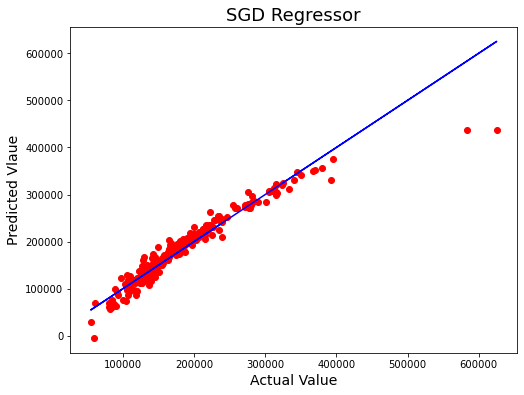

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_sgd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SGD Regressor',fontsize=18)
plt.show()

The above results shows that the datapoints near the best fit line and not on it. Trying model testing with different algorithm.

# Ensemble Methods:

# 1.Random Forest Regressor:

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_rf = rf.predict(xtest)

rf_r2 = r2_score(ytest,pred_rd)
print('R2 Score:',rf_r2*100)

rf_score = cross_val_score(rf,x_train,y_train,cv=9)
rf_cc = rf_score.mean() 
print('Cross Val Score:',rf_cc*100)

R2 Score: 92.44155097677849
Cross Val Score: 99.660014471136


In [93]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rf))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rf))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rf)))

Error:
Mean Absolute Error: 494.82824786324716
Mean Squared Error: 5287186.732941448
Root Mean Square Error: 2299.3883388721983


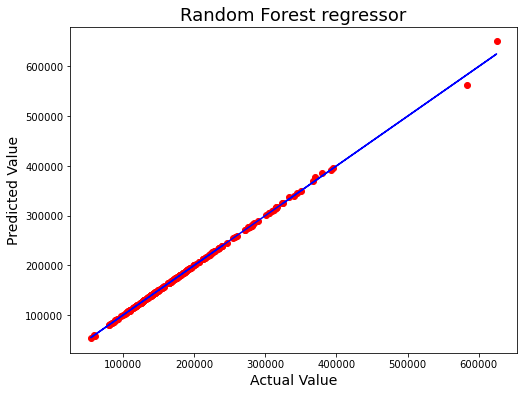

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rf, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# 2.Ada Boost Regressor:

In [95]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50)
ada.fit(xtrain,ytrain)
ada.score(xtrain,ytrain)
pred_ada = ada.predict(xtest)

ada_r2 = r2_score(ytest,pred_ada)
print('R2 Score:',ada_r2*100)

ada_score = cross_val_score(ada,x_train,y_train,cv=9)
ada_cc = ada_score.mean() 
print('Cross Val Score:',ada_cc*100)

R2 Score: 97.64682009979096
Cross Val Score: 98.48009253008847


In [96]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ada))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ada)))

Error:
Mean Absolute Error: 7332.338255985092
Mean Squared Error: 146900730.24285796
Root Mean Square Error: 12120.26114581934


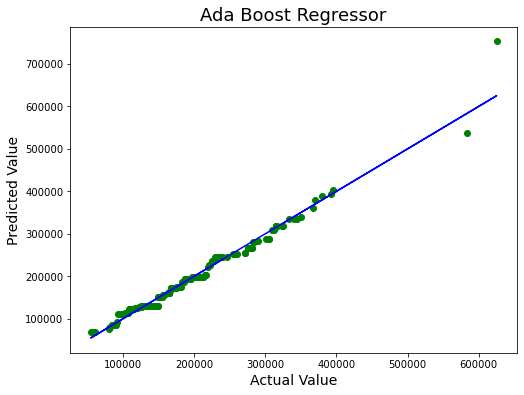

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ada, color='g')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Ada Boost Regressor',fontsize=18)
plt.show()

# 3.Gradient Boosting Regressor:

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gbr =gbr.predict(xtest)

gbrs= r2_score(ytest,pred_gbr)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x_train,y_train,cv=9)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 99.74918899107949
Cross Val Score: 99.84174045720722


In [99]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gbr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gbr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gbr)))

Error:
Mean Absolute Error: 926.0670102895816
Mean Squared Error: 15657247.607841903
Root Mean Square Error: 3956.924008348139


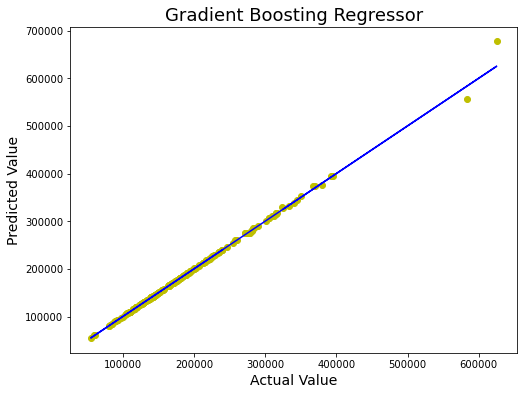

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gbr, color='y')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

The best model is Gradient Boosting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.
The datapoints fit in the linear fit line.

# Model Saving:

In [101]:
import pickle
filename = 'house_price.pkl'
pickle.dump(gbr, open(filename, 'wb'))

# Conclusion:

In [102]:
import numpy as np
a=np.array(ytest)
a

array([240000., 175000., 143000., 104900., 115000., 146000., 142500.,
        91500., 246578., 167500., 135500.,  89500.,  84500., 128950.,
       156000., 152000., 171750., 145000., 341000., 163500., 163990.,
       125000., 582933., 175500., 100000., 144900., 124000., 212000.,
       130500., 305900., 165000., 219500., 139900., 145000., 110000.,
       221500., 235000., 284000., 367294.,  84900., 350000., 142000.,
       165000.,  60000., 272000., 195000., 155000., 140000., 125000.,
       138000., 200000.,  92900., 200100., 106250., 179500., 127500.,
       216500., 145500., 132500., 194000., 215000., 149000., 316600.,
       145000., 119200., 281213., 141000., 277000.,  55000., 181000.,
       109900., 144000., 176000.,  90000., 185000., 120000., 141000.,
       200624., 119000., 169500., 130500., 119900.,  61000., 125000.,
       110500., 132250., 109900., 394617., 235000., 222000., 312500.,
       212000., 165500., 185000., 150000., 207500., 149000., 140000.,
       200000., 3699

In [103]:
predicted=np.array(gbr.predict(xtest))
predicted

array([239849.48890777, 175370.43641396, 143577.59836462, 104867.53907554,
       114953.11969744, 145335.31278537, 141845.64330658,  92869.55211406,
       244877.57663281, 167818.03816781, 135632.95216667,  90120.45563269,
        84349.11801786, 128291.84913119, 155912.03633603, 151976.73246645,
       171167.52861371, 145423.93488594, 337670.37606642, 164001.06088157,
       163960.70220025, 125630.03783134, 556909.32134227, 175385.98236197,
        99620.75610941, 145166.64544477, 123672.06609849, 211822.61060379,
       130572.39559506, 307523.7229295 , 164841.07394983, 219288.46542075,
       140038.86285826, 145179.47786602, 110216.20647733, 221522.07861448,
       234863.95637748, 285874.77964321, 374530.23830937,  85322.28769045,
       352376.07856519, 141840.67875582, 164928.39938824,  60585.86649761,
       274561.65106933, 194490.25176564, 155589.98756461, 139993.52947212,
       125703.32003612, 137740.53607805, 200058.80041509,  93040.541285  ,
       200075.43923453, 1

In [104]:
house_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
house_com

,original,predicted
0,240000.0,239849.488908
1,175000.0,175370.436414
2,143000.0,143577.598365
3,104900.0,104867.539076
4,115000.0,114953.119697
...,...,...
229,257000.0,259691.478945
230,145900.0,145004.674511
231,172785.0,172989.255398
232,234000.0,232296.211964


# From the above table, the model is predicted with 99 percent accuracy.